## GRIP AUG 2021 BATCH

### Problem Statement: Predict the percentage of a student based on the no. of study hours. What will be the predicted score if a student studies for 9.25 hrs/day?

### Name: PRANAV SUDHIR PATIL¶

### Importing Libraries to be Used:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset:

In [9]:
data = pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.shape

(25, 2)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
print(data.mean())

Hours      5.012
Scores    51.480
dtype: float64


In [14]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Result and Features needed to be Seperated: 

In [15]:
x = data.iloc[:,:-1].values
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [16]:
y = data.iloc[:,1].values
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [17]:
x.shape

(25, 1)

In [18]:
y.shape

(25,)

### Visualization of the Data: 

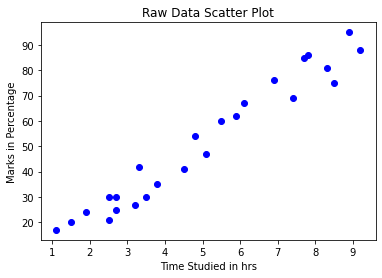

In [19]:
# using the matplotlib library here:
plt.scatter(x,y,color = "Blue") # scatter plot
plt.title("Raw Data Scatter Plot")
plt.xlabel("Time Studied in hrs")
plt.ylabel("Marks in Percentage")
plt.show();

### Model Creation: 
This problem statement is a simple linear regression problem as we can see there is a proportionality  between Marks in percentage and Time Studied in hrs.

In [20]:
# For data modelling, I will be using scikit learn library.
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


### Training Model: 

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linModel = LinearRegression()
linModel.fit(X_train, Y_train)
print(f'Coefficient : {linModel.coef_}\nIntercept : {linModel.intercept_}\nAccuracy : {round(linModel.score(X_test,Y_test),4)*100}%')

Coefficient : [9.91065648]
Intercept : 2.0181600414346974
Accuracy : 94.55%


So, the model that I've trained is accurate by 94.55%. 

### Predicted values:

In [26]:
predictions = linModel.predict(X_test)
data_predicted = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions}) 
data_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


As we can see from the "data_predicted" data, the Actual Column data is somewhat similar to the Predicted Column Values.

### Plotting Linear Regression line wrt the test data: 

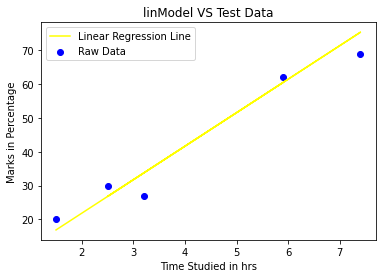

In [27]:
plt.plot(X_test, predictions,'yellow', label = 'Linear Regression Line')
plt.scatter(X_test, Y_test, label = "Raw Data",color="Blue")
plt.title('linModel VS Test Data')
plt.xlabel("Time Studied in hrs")
plt.ylabel("Marks in Percentage")
plt.legend()
plt.show()

### Plotting Linear Regression Line wrt Whole Dataset:
The Formula is: y = mx + c; where, m is the coefficient and c is the y-intercept

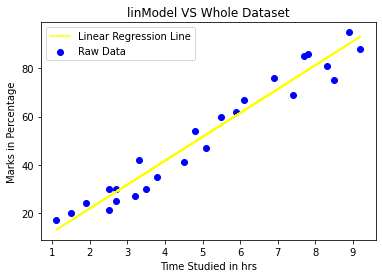

In [28]:
l = (linModel.coef_ * x) + linModel.intercept_
plt.scatter(x,y, label = "Raw Data", color = "Blue")
plt.plot(x, l , 'Yellow', label = "Linear Regression Line")
plt.title("linModel VS Whole Dataset")
plt.xlabel("Time Studied in hrs")
plt.ylabel("Marks in Percentage")
plt.legend()
plt.show();

### After Analysis of raw as well as whole data and doing it visually:
#### What will be the predicted score if a student studies for 9.25 hrs/day?

In [30]:
hrs = float(input("Hours Studied per day: "))
hrs = np.reshape(hrs,(-1,1))
predicted = linModel.predict(hrs)
print(f'Predicted Score: {float(predicted[0])} %')
print(f'Rounded Predicted Score: {round(predicted[0],4)} %')

Hours Studied per day: 9.25
Predicted Score: 93.69173248737535 %
Rounded Predicted Score: 93.6917 %


In [31]:
from sklearn import metrics
print(f'Mean Absolute Error: {metrics.mean_absolute_error(Y_test, predictions)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_test, predictions)}')

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406


I have calculated two errors in Metrics i.e. Mean Absolute Error and Mean Squared Error.

### Conclusion:
It was a simple Linear Regression Probelm which is Supervised Machine Learning Concept. So, this was the first task of GRIP|TSF - Data Analytics and Business Analysis Internship.

I have successfully predicted the Score to be:

93.69 % if a student studies for 9.25 hrs/day

### Thank You !